In [1]:
import itertools
import numpy as np
import networkx as nx
import numpy.random as rnd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
a = np.zeros((100, 100))
k = 0
i_mas = []
j_mas = []
while k < 500:
    i = np.random.randint(0, 100)
    i_mas.append(i)
    j = np.random.randint(0, 100)
    j_mas.append(j)
    if (i != j):
        a[i][j] = np.random.randint(1, 5)
        a[j][i] = a[i][j]
        k += 1 

In [3]:
INF = pow(10, 10)
i = 0
j = 0
while i < len(a):
    j = 0
    while j <len(a):
        if a[i][j] == 0:
            a[i][j] = INF
        j += 1
    i += 1

In [4]:
i = 0
while i < len(a):
    print(a[90][i])
    i +=1

10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
1.0
10000000000.0
1.0
2.0
2.0
2.0
10000000000.0
10000000000.0
10000000000.0
1.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
2.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
4.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
10000000000.0
2.0
10000000000.

In [5]:
a

array([[1.e+10, 1.e+10, 1.e+10, ..., 1.e+10, 2.e+00, 1.e+10],
       [1.e+10, 1.e+10, 4.e+00, ..., 1.e+10, 1.e+10, 1.e+10],
       [1.e+10, 4.e+00, 1.e+10, ..., 1.e+10, 1.e+10, 1.e+00],
       ...,
       [1.e+10, 1.e+10, 1.e+10, ..., 1.e+10, 1.e+10, 1.e+10],
       [2.e+00, 1.e+10, 1.e+10, ..., 1.e+10, 1.e+10, 2.e+00],
       [1.e+10, 1.e+10, 1.e+00, ..., 1.e+10, 2.e+00, 1.e+10]])

In [6]:
sum(np.sum( a, axis = 1))

90560000002370.0

In [7]:
graph = nx.Graph()
N_range = range(len(a))
graph.add_nodes_from(N_range)

In [8]:
i = 0
while i < len(a):
    j = 0
    c = a[i][j]
    while j < len(a):
        if (a[i][j] != 0):
            graph.add_edge(j, i)
        j += 1
    i += 1

NetworkXError: random_state_index is incorrect

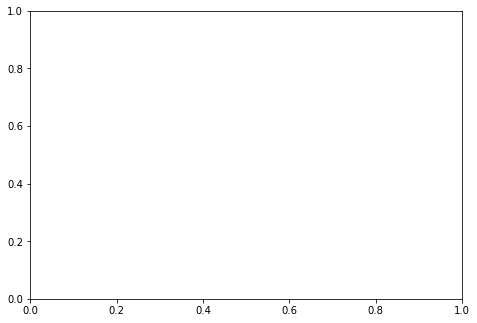

In [9]:
nx.draw(graph, with_labels = True, node_size =30)

In [10]:

def dij(start, n):
    
    INF = 10 ** 10
    dist = [INF] * n
    dist[start] = 0
    used = [False] * n
    min_dist = 0
    min_vertex = start
    while min_dist < INF:
          
        i = min_vertex 
        used[i] = True 
        for j in range(n): 
            if dist[i] + a[i][j] < dist[j]: 
                dist[j] = dist[i] + a[i][j] 
        min_dist = INF
        for j in range(n):
            if not used[j] and dist[j] < min_dist:
                min_dist = dist[j]
                min_vertex = j
    return dist


In [11]:
from time import perf_counter

In [12]:
n=0
time_f_1 = []
sum = 0
t0 = 0
t1 = 0

while n < 10:
    t0 = perf_counter()
    dij(90, 100)
    t1 = perf_counter()
    sum = sum + (t1 - t0)
    print(n)
    n += 1
    
print(sum/10)

0
1
2
3
4
5
6
7
8
9
0.010536590000000245


In [13]:
def bel(start, N):
    INF = 10 ** 9 
    N= 100
    F = [INF] * N 
    F[start] = 0 
    for k in range(1, N):
        for i in range(N):
            for j in range(N):
                if F[j] + a[j][i] < F[i]:
                    F[i] = F[j] + a[j][i]


In [14]:
n=0
time_f_1 = []
sum = 0
t0 = 0
t1 = 0
b = []
while n < 10:
    t0 = perf_counter()
    bel(90, 100)
    t1 = perf_counter()
    sum = sum + (t1 - t0)
    
    print(n)
    n += 1
    
print(sum/10)

0
1
2
3
4
5
6
7
8
9
0.37179967


In [16]:
0.37179967/0.010536590000000245

35.28652723509137

In [17]:
from __future__ import annotations
# some of these types are deprecated: https://www.python.org/dev/peps/pep-0585/
from typing import Protocol, Dict, List, Iterator, Tuple, TypeVar, Optional
T = TypeVar('T')

Location = TypeVar('Location')
class Graph(Protocol):
    def neighbors(self, id: Location) -> List[Location]: pass

class SimpleGraph:
    def __init__(self):
        self.edges: Dict[Location, List[Location]] = {}
    
    def neighbors(self, id: Location) -> List[Location]:
        return self.edges[id]

example_graph = SimpleGraph()
example_graph.edges = {
    'A': ['B'],
    'B': ['C'],
    'C': ['B', 'D', 'F'],
    'D': ['C', 'E'],
    'E': ['F'],
    'F': [],
}

import collections

class Queue:
    def __init__(self):
        self.elements = collections.deque()
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, x: T):
        self.elements.append(x)
    
    def get(self) -> T:
        return self.elements.popleft()

# utility functions for dealing with square grids
def from_id_width(id, width):
    return (id % width, id // width)

def draw_tile(graph, id, style):
    r = " . "
    if 'number' in style and id in style['number']: r = " %-2d" % style['number'][id]
    if 'point_to' in style and style['point_to'].get(id, None) is not None:
        (x1, y1) = id
        (x2, y2) = style['point_to'][id]
        if x2 == x1 + 1: r = " > "
        if x2 == x1 - 1: r = " < "
        if y2 == y1 + 1: r = " v "
        if y2 == y1 - 1: r = " ^ "
    if 'path' in style and id in style['path']:   r = " @ "
    if 'start' in style and id == style['start']: r = " A "
    if 'goal' in style and id == style['goal']:   r = " B "
    if id in graph.walls: r = "[ ]"
    return r

def draw_grid(graph, **style):
    print("___" * graph.width)
    for y in range(graph.height):
        for x in range(graph.width):
            print("%s" % draw_tile(graph, (x, y), style), end="")
        print()
    print("~~~" * graph.width)

# data from main article
DIAGRAM1_WALLS = [from_id_width(id, width=35) for id in [10, 11,3, 4,5, 6,21,22,51,52,81,82,93,94,111,112,123,124,133,134,141,142,153,154,163,164,171,172,173,174,175,183,184,193,194,201,202,203,204,205,213,214,223,224,243,244,253,254,273,274,283,284,303,304,313,314,333,334,343,344,373,374,403,404,433,434]]

GridLocation = Tuple[int, int]

class SquareGrid:
    def __init__(self, width: int, height: int):
        self.width = width
        self.height = height
        self.walls: List[GridLocation] = []
    
    def in_bounds(self, id: GridLocation) -> bool:
        (x, y) = id
        return 0 <= x < self.width and 0 <= y < self.height
    
    def passable(self, id: GridLocation) -> bool:
        return id not in self.walls
    
    def neighbors(self, id: GridLocation) -> Iterator[GridLocation]:
        (x, y) = id
        neighbors = [(x+1, y), (x-1, y), (x, y-1), (x, y+1)] # E W N S
        # see "Ugly paths" section for an explanation:
        if (x + y) % 2 == 0: neighbors.reverse() # S N W E
        results = filter(self.in_bounds, neighbors)
        results = filter(self.passable, results)
        return results

class WeightedGraph(Graph):
    def cost(self, from_id: Location, to_id: Location) -> float: pass

class GridWithWeights(SquareGrid):
    def __init__(self, width: int, height: int):
        super().__init__(width, height)
        self.weights: Dict[GridLocation, float] = {}
    
    def cost(self, from_node: GridLocation, to_node: GridLocation) -> float:
        return self.weights.get(to_node, 1)

diagram4 = GridWithWeights(20, 10)
diagram4.walls = [(2, 7), (2, 3), (5,1), (6, 6),(5, 5),(7, 10), (5, 10), (15, 9),(15, 2), (10, 1), (12, 3), (7, 1), (9, 10), (3, 8), (8,3), (11,2), (2, 11), (13, 5), (5, 13), (15, 4), (4, 7), (19, 3), (2, 9), (17,5), (8, 8), (9,9), (3,3),(4,4),(7,7),(8,8), (13,2),(13,4),(13,6), (11,1),(11,3), (19,7), (19,9), (13,1), (9,6), (6,9),(15,1),(15,3),(15,5),(15, 7),(18,1),(18,3),(1,7),(7,1), (3,8)]
diagram4.weights = {loc: 5 for loc in [(3, 4), (3, 5), (4, 1), (4, 2),
                                       (4, 3), (4, 4), (4, 5), (4, 6),
                                       (4, 7), (4, 8), (5, 1), (5, 2),
                                       (5, 3), (5, 4), (5, 5), (5, 6),
                                       (5, 7), (5, 8), (6, 2), (6, 3),
                                       (6, 4), (6, 5), (6, 6), (6, 7),
                                       (7, 3), (7, 4), (7, 5), (6, 8)]}

import heapq

class PriorityQueue:
    def __init__(self):
        self.elements: List[Tuple[float, T]] = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item: T, priority: float):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self) -> T:
        return heapq.heappop(self.elements)[1]

def dijkstra_search(graph: WeightedGraph, start: Location, goal: Location):
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from: Dict[Location, Optional[Location]] = {}
    cost_so_far: Dict[Location, float] = {}
    came_from[start] = None
    cost_so_far[start] = 0
    
    while not frontier.empty():
        current: Location = frontier.get()
        
        if current == goal:
            break
        
        for next in graph.neighbors(current):
            new_cost = cost_so_far[current] + graph.cost(current, next)
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost
                frontier.put(next, priority)
                came_from[next] = current
    
    return came_from, cost_so_far

# thanks to @m1sp <Jaiden Mispy> for this simpler version of
# reconstruct_path that doesn't have duplicate entries

def reconstruct_path(came_from: Dict[Location, Location],
                     start: Location, goal: Location) -> List[Location]:
    current: Location = goal
    path: List[Location] = []
    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start) # optional
    path.reverse() # optional
    return path

def heuristic(a: GridLocation, b: GridLocation) -> float:
    (x1, y1) = a
    (x2, y2) = b
    return abs(x1 - x2) + abs(y1 - y2)

def a_star_search(graph: WeightedGraph, start: Location, goal: Location):
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from: Dict[Location, Optional[Location]] = {}
    cost_so_far: Dict[Location, float] = {}
    came_from[start] = None
    cost_so_far[start] = 0
    
    while not frontier.empty():
        current: Location = frontier.get()
        
        if current == goal:
            break
        
        for next in graph.neighbors(current):
            new_cost = cost_so_far[current] + graph.cost(current, next)
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost + heuristic(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    
    return came_from, cost_so_far

def breadth_first_search(graph: Graph, start: Location, goal: Location):
    frontier = Queue()
    frontier.put(start)
    came_from: Dict[Location, Optional[Location]] = {}
    came_from[start] = None
    
    while not frontier.empty():
        current: Location = frontier.get()
        
        if current == goal:
            break
        
        for next in graph.neighbors(current):
            if next not in came_from:
                frontier.put(next)
                came_from[next] = current
    
    return came_from

class SquareGridNeighborOrder(SquareGrid):
    def neighbors(self, id):
        (x, y) = id
        neighbors = [(x + dx, y + dy) for (dx, dy) in self.NEIGHBOR_ORDER]
        results = filter(self.in_bounds, neighbors)
        results = filter(self.passable, results)
        return list(results)

def test_with_custom_order(neighbor_order):
    if neighbor_order:
        g = SquareGridNeighborOrder(30, 15)
        g.NEIGHBOR_ORDER = neighbor_order
    else:
        g = SquareGrid(30, 15)
    g.walls = DIAGRAM1_WALLS
    start, goal = (8, 7), (27, 2)
    came_from = breadth_first_search(g, start, goal)
    draw_grid(g, path=reconstruct_path(came_from, start=start, goal=goal),
              point_to=came_from, start=start, goal=goal)

class GridWithAdjustedWeights(GridWithWeights):
    def cost(self, from_node, to_node):
        prev_cost = super().cost(from_node, to_node)
        nudge = 0
        (x1, y1) = from_node
        (x2, y2) = to_node
        if (x1 + y1) % 2 == 0 and x2 != x1: nudge = 1
        if (x1 + y1) % 2 == 1 and y2 != y1: nudge = 1
        return prev_cost + 0.001 * nudge

In [18]:
def breadth_first_search_1(graph, start):
    # печать того, что мы нашли
    frontier = Queue()
    frontier.put(start)
    visited = {}
    visited[start] = True
    
    while not frontier.empty():
        current = frontier.get()
        print("Visiting %r" % current)
        for next in graph.neighbors(current):
            if next not in visited:
                frontier.put(next)
                visited[next] = True

breadth_first_search_1(example_graph, 'A')

Visiting 'A'
Visiting 'B'
Visiting 'C'
Visiting 'D'
Visiting 'F'
Visiting 'E'


In [19]:

g = SquareGrid(20, 10)
g.walls = DIAGRAM1_WALLS # список long, [(21, 0), (21, 2), ...]
draw_grid(g)

____________________________________________________________
 .  .  . [ ][ ][ ][ ] .  .  . [ ][ ] .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . [ ][ ] .  . 
 .  .  .  .  .  .  .  .  .  .  . [ ][ ] .  .  .  .  .  .  . 
 .  .  .  .  .  . [ ][ ] .  .  .  .  .  .  .  .  .  . [ ][ ]
 . [ ][ ] .  .  .  .  .  .  .  .  .  . [ ][ ] .  .  .  .  . 
[ ] .  .  .  .  .  .  . [ ][ ] .  .  .  .  .  .  .  . [ ][ ]
 .  .  . [ ][ ] .  .  .  .  .  .  .  . [ ][ ] .  .  .  .  . 
 .  .  .  .  .  .  .  . [ ][ ] .  .  .  .  .  .  .  .  .  . 
 .  .  . [ ][ ] .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . [ ][ ]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [20]:
def heuristic(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return abs(x1 - x2) + abs(y1 - y2)

def a_star_search(graph, start, goal):
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0
    
    while not frontier.empty():
        current = frontier.get()
        
        if current == goal:
            break
        
        for next in graph.neighbors(current):
            new_cost = cost_so_far[current] + graph.cost(current, next)
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost + heuristic(goal, next)
                frontier.put(next, priority)
                came_from[next] = current
    
    return came_from, cost_so_far

In [21]:

came_from, cost_so_far = a_star_search(diagram4, (1, 1), (16, 7))
draw_grid(diagram4, width=3, point_to=came_from, start=(1, 1), goal=(16, 7))
print()
draw_grid(diagram4, width=3, number=cost_so_far, start=(1, 1), goal=(16, 7))
draw_grid(diagram4, width=3, path=reconstruct_path(came_from, start=(1, 1), goal=(16, 7)))

____________________________________________________________
 v  v  v  v  <  <  <  <  <  <  <  <  <  <  <  <  <  <  .  . 
 >  A  <  <  < [ ] ^ [ ] ^  < [ ][ ] ^ [ ] ^ [ ] ^  < [ ] . 
 >  ^  <  <  <  .  ^  >  ^  <  < [ ] ^ [ ] ^ [ ] ^  <  .  . 
 >  ^ [ ][ ] .  .  .  . [ ] ^  < [ ][ ] >  ^ [ ] ^  < [ ][ ]
 >  ^  <  < [ ] .  .  .  >  ^  <  <  < [ ] ^ [ ] ^  <  .  . 
 >  ^  <  <  . [ ] .  .  >  ^  <  <  < [ ] ^ [ ] ^ [ ] .  . 
 >  ^  <  <  <  . [ ] .  . [ ] ^  <  < [ ] ^  <  <  <  .  . 
 ^ [ ][ ] ^ [ ] .  . [ ] .  >  ^  <  <  <  < [ ] B  .  . [ ]
 ^  .  . [ ] .  .  .  . [ ] .  ^  ^  ^  ^  ^  .  .  .  .  . 
 .  . [ ] .  .  . [ ] .  . [ ] .  .  .  .  . [ ] .  .  . [ ]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

____________________________________________________________
 2  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 .  . 
 1  A  1  2  7 [ ] 7 [ ] 9  10[ ][ ] 13[ ] 15[ ] 17 18[ ] . 
 2  1  2  3  8  .  12 11 10 11 12[ ] 14[ ] 16[ ] 18 19 .  . 
 3  2 [ ][ ] .  .  .  .